**BT4012 Group 12**
<br> In this notebook, we will be exploring the [Ethereum dataset](https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset) (Section A) and also the machine learning models (Section B) that we used for our Fraud Analytics Project.

*More elaborations and explanation can be found in our report.*

# **A. Pre-processing Steps**

In this section, we aim to get an overview of the dataset (number of observations, number of variables, type of variables, etc.). This will help us to better understand our dataset even before we carry out any form of fraud analysis. We also intend to identify any abnormalities that can potentially lead to biases in our analysis.

## **1. Load Data**

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://raw.githubusercontent.com/joeyylow/EthereumFraudAnalysis/main/transaction_dataset.csv'
df = pd.read_csv(url, index_col=0)

In [ ]:
from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

## **2. Exploratory Data Analysis (EDA)**

### **2.1 Overview of each column in our dataset**

In [ ]:
# Displaying the first 5 rows of values for each column
df.head()

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


### **2.2 Hypotheses**

#### 2.2.1 Hypothesis 1: **Our dataset is imbalanced**

0    7662
1    2179
Name: FLAG, dtype: int64
The percentage of Non-Fraud activities is 77.86%.
The percentage of Fraudulent activities is 22.14%.




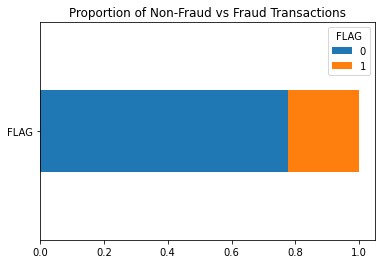

In [ ]:
# Calculating % of non-fraud vs fraud activities
flag_count = df['FLAG'].value_counts()
print(flag_count)
#print('\n')

non_fraud = df['FLAG'].where(df['FLAG'] == 0)
no_of_non_fraud = non_fraud.count()
fraud = df['FLAG'].where(df['FLAG'] == 1)
no_of_fraud = fraud.count()
total_flags = df['FLAG'].count()
percentage_non_fraud = round((no_of_non_fraud/total_flags)*100, 2)
percentage_fraud = round((no_of_fraud/total_flags)*100, 2)

print(f'The percentage of Non-Fraud activities is {percentage_non_fraud}%.')
print(f'The percentage of Fraudulent activities is {percentage_fraud}%.')
print('\n')

# Plotting a stacked bar graph
ax = (df.groupby('FLAG')[['FLAG']].count()/df[['FLAG']].count()).T.plot(
    kind = 'barh',
    stacked = True,
    width = 0.3,
    title = 'Proportion of Non-Fraud vs Fraud Transactions'
)

#### 2.2.2 Hypothesis 2: **Each row in our dataset is unique**

In [ ]:
# Displaying all the duplicated rows
df[df.iloc[: , 1:].duplicated()]

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2933,1,0x4c13f6966dc24c92489344f0fd6f0e61f3489b84,0,5980.35,18633.46,498256.47,21,20,0,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
2934,2,0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1,0,7042.64,2694.86,80594.87,8,9,0,8,...,140.102687,1.401027e+02,140.102687,0.0,0.0,0.0,1.0,2.0,Golem,OmiseGO
2936,4,0x4c268c7b1d51b369153d6f1f28c61b15f0e17746,0,0.00,0.00,0.00,0,1,0,1,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,None,Livepeer Token
2937,5,0x4c26a3c12a64f33a3546fbb206c5365ce8e82c20,0,0.00,0.00,0.00,0,1,0,1,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,None,Livepeer Token
2939,7,0x4c27438a77738153f6cf3ed890b2817d52ebf584,0,9695.78,1133.48,257022.97,14,107,0,6,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,None,AICRYPTO
2940,8,0x4c391cc032c9107b596267610a05262c90fc2df7,0,161.24,0.92,324.32,2,2,0,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
2941,9,0x4c4a03e100b4b104355edc4c50ce12b9a2879547,0,6783.50,48019.41,1028223.27,10,20,0,7,...,0.883954,8.839540e-01,0.883954,0.0,0.0,0.0,1.0,1.0,OmiseGO,OmiseGO
2942,10,0x4c4da560350e302232a184c8fa16b126a772c326,0,0.00,0.00,5.70,1,1,0,1,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
2943,11,0x4c5b0709f66719861e7277c9dcda9175deb3d866,0,2.32,0.07,9.42,4,2,0,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
2947,15,0x4c7f6d5b287054bf41f9d49ea8d2ca6e6837850b,0,4.72,0.00,28.30,6,1,0,1,...,15.000000,1.500000e+01,15.000000,0.0,0.0,0.0,1.0,1.0,Veritaseum,Veritaseum


#### 2.2.3 Hypothesis 3: **Each row represents one transaction**

In [ ]:
df.head()

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


After taking a closer look at each column, it did not make sense to us that each row is a transaction. Our hypothesis was proven wrong and we now believe that each row represents the **activities of a particular address** (value in `Address` column), instead of representing one transaction.

#### 2.2.4 Hypothesis 4: **There are missing values in our dataset**

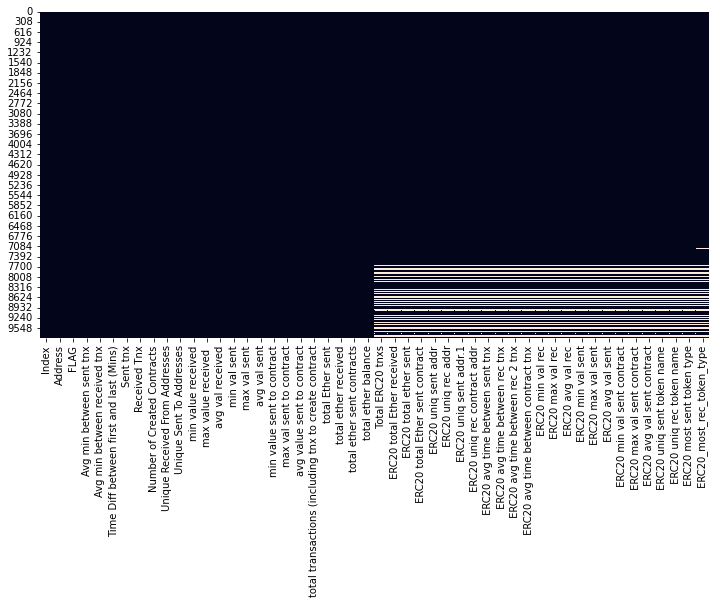

In [ ]:
# White portions of heatmap suggest the presence of missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar = False)
plt.show()

In [ ]:
# Number of null values in each column
df.isnull().sum()

Index                                                     0
Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                            

In [ ]:
# Extract the columns with missing values
# PART 1: Only extracting the columns with the same number of missing values

missing_values_columns = df.iloc[:,25:48]
na_columns = missing_values_columns[missing_values_columns[' Total ERC20 tnxs'].isna()]
na_columns

,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
7662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
na_columns.count()

 Total ERC20 tnxs                       0
 ERC20 total Ether received             0
 ERC20 total ether sent                 0
 ERC20 total Ether sent contract        0
 ERC20 uniq sent addr                   0
 ERC20 uniq rec addr                    0
 ERC20 uniq sent addr.1                 0
 ERC20 uniq rec contract addr           0
 ERC20 avg time between sent tnx        0
 ERC20 avg time between rec tnx         0
 ERC20 avg time between rec 2 tnx       0
 ERC20 avg time between contract tnx    0
 ERC20 min val rec                      0
 ERC20 max val rec                      0
 ERC20 avg val rec                      0
 ERC20 min val sent                     0
 ERC20 max val sent                     0
 ERC20 avg val sent                     0
 ERC20 min val sent contract            0
 ERC20 max val sent contract            0
 ERC20 avg val sent contract            0
 ERC20 uniq sent token name             0
 ERC20 uniq rec token name              0
dtype: int64

The above shows that the rows that have missing values for each of these columns are the same rows across all columns.

In [ ]:
# Observing the `flag` and the columns with NA values
na_dataframe1 = df[df[' Total ERC20 tnxs'].isna()]
na_df1 = na_dataframe1['FLAG']
na_df2 = na_dataframe1.iloc[:,25:48]
newdf1 = pd.concat([na_df1, na_df2], axis=1)
newdf1

,FLAG,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
7662,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7666,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7675,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7676,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7678,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9835,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Verifying if the rows with NA values for columns 25 and onwards have their `flag` values as 1
newdf1[newdf1['FLAG'] == 0]

,FLAG,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name


There are no rows (transactions) displayed above. This suggests that all the rows with missing values for columns 25 onwards are considered as fraudulent transactions.

In [ ]:
percentage = na_dataframe1['FLAG'].sum()/df['FLAG'].sum()*100
round(percentage, 2)
print('The missing values in columns 25 onwards make up ' + str(round(percentage, 2)) + '% of all fraudulent transactions in the dataset.')

The missing values in columns 25 onwards make up 38.04% of all fraudulent transactions in the dataset.


This significant number of fraudulent transactions reminds us that we need to exercise caution when deciding what to do with the missing values later on during data cleaning. Deletion of the rows with missing values might not be the most ideal.

In [ ]:
# PART 2: Extracting columns with more than 829 missing values (`erc20 most sent token type` and `erc20_most_rec_token_type`)

# `ERC20 most sent token type`
na_dataframe2 = df[df[' ERC20 most sent token type'].isna()]
na_df2a = na_dataframe2['FLAG']
na_df2b = na_dataframe2[' ERC20 most sent token type']
newdf2 = pd.concat([na_df2a, na_df2b], axis=1)

no_of_fraud = newdf2['FLAG'].sum()
no_of_na = df[' ERC20 most sent token type'].isnull().sum()
percentage_of_fraud = no_of_fraud/no_of_na*100
round(percentage_of_fraud, 2)
print(str(round(percentage_of_fraud, 2)) + '% of the NA values in `ERC20 most sent token type` are fraudulent transactions.')

98.57% of the NA values in `ERC20 most sent token type` are fraudulent transactions.


In [ ]:
# `ERC20_most_rec_token_type`
na_dataframe3 = df[df[' ERC20_most_rec_token_type'].isna()]
na_df3a = na_dataframe3['FLAG']
na_df3b = na_dataframe3[' ERC20_most_rec_token_type']
newdf3 = pd.concat([na_df3a, na_df3b], axis=1)

no_of_fraud = newdf3['FLAG'].sum()
no_of_na = df[' ERC20_most_rec_token_type'].isnull().sum()
percentage_of_fraud = no_of_fraud/no_of_na*100
print(str(round(percentage_of_fraud, 2)) + '% of the NA values in `ERC20_most_rec_token_type` are fraudulent transactions.')

97.41% of the NA values in `ERC20_most_rec_token_type` are fraudulent transactions.


As seen from *Section 2.2.1 Hypothesis 1*, the percentage of Non-Fraud transactions is 77.86%, while the percentage of Fraudulent transactions is 22.14%. However, for both columns `ERC20 most sent token type` and `ERC20_most_rec_token_type`, we noticed that 98.57% and 97.41% of the NA values in `ERC20 most sent token type` and `ERC20_most_rec_token_type` are fraudulent transactions respectively.

These much higher weightages of the fraudulent transactions of these NA values (98.57% and 97.41%)  as compared to that of the weightage of the overall dataset (22.14%) shows that there could be some correlation between the labels and the columns.

Hence this reminds us that deletion of these columns might not be the most ideal. We could explore other methods of handling missing values in the data cleaning section.

#### 2.2.5 Hypothesis 5: **Our data is skewed**


##### A. Checking skewness using `.skew()`

In [ ]:
df.select_dtypes(include = ['float64', 'int64']).skew()

Index                                                    0.572970
FLAG                                                     1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val se

##### B. Investigating the distribution of our features using boxplots.

In [ ]:
columns = df.columns
columns

Index(['Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time betwe

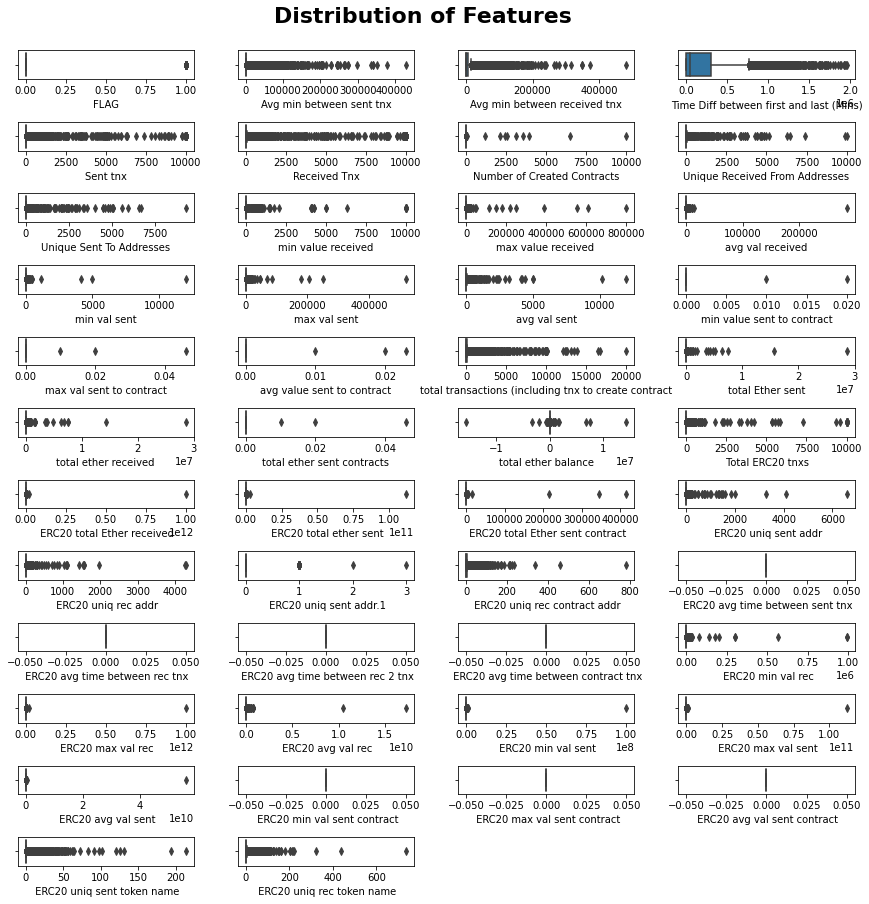

In [ ]:
# Plotting the boxplots
fig, axes = plt.subplots(12, 4, figsize=(15, 15))
fig.delaxes(axes[11][2])
fig.delaxes(axes[11][3])
plt.subplots_adjust(wspace=0.25, hspace=1.5)
plt.suptitle("Distribution of Features",y=0.92, size=22, weight='bold')

ax1 = sns.boxplot(ax = axes[0,0], data=df, x=columns[2])
ax2 = sns.boxplot(ax = axes[0,1], data=df, x=columns[3])
ax3 = sns.boxplot(ax = axes[0,2], data=df, x=columns[4])
ax4 = sns.boxplot(ax = axes[0,3], data=df, x=columns[5])
ax5 = sns.boxplot(ax = axes[1,0], data=df, x=columns[6])
ax6 = sns.boxplot(ax = axes[1,1], data=df, x=columns[7])
ax7 = sns.boxplot(ax = axes[1,2], data=df, x=columns[8])
ax8 = sns.boxplot(ax = axes[1,3], data=df, x=columns[9])
ax9 = sns.boxplot(ax = axes[2,0], data=df, x=columns[10])
ax10 = sns.boxplot(ax = axes[2,1], data=df, x=columns[11])
ax11 = sns.boxplot(ax = axes[2,2], data=df, x=columns[12])
ax12 = sns.boxplot(ax = axes[2,3], data=df, x=columns[13])
ax13 = sns.boxplot(ax = axes[3,0], data=df, x=columns[14])
ax14 = sns.boxplot(ax = axes[3,1], data=df, x=columns[15])
ax15 = sns.boxplot(ax = axes[3,2], data=df, x=columns[16])
ax16 = sns.boxplot(ax = axes[3,3], data=df, x=columns[17])
ax17 = sns.boxplot(ax = axes[4,0], data=df, x=columns[18])
ax18 = sns.boxplot(ax = axes[4,1], data=df, x=columns[19])
ax19 = sns.boxplot(ax = axes[4,2], data=df, x=columns[20])
ax20 = sns.boxplot(ax = axes[4,3], data=df, x=columns[21])
ax21 = sns.boxplot(ax = axes[5,0], data=df, x=columns[22])
ax22 = sns.boxplot(ax = axes[5,1], data=df, x=columns[23])
ax23 = sns.boxplot(ax = axes[5,2], data=df, x=columns[24])
ax24 = sns.boxplot(ax = axes[5,3], data=df, x=columns[25])
ax25 = sns.boxplot(ax = axes[6,0], data=df, x=columns[26])
ax26 = sns.boxplot(ax = axes[6,1], data=df, x=columns[27])
ax27 = sns.boxplot(ax = axes[6,2], data=df, x=columns[28])
ax28 = sns.boxplot(ax = axes[6,3], data=df, x=columns[29])
ax29 = sns.boxplot(ax = axes[7,0], data=df, x=columns[30])
ax30 = sns.boxplot(ax = axes[7,1], data=df, x=columns[31])
ax31 = sns.boxplot(ax = axes[7,2], data=df, x=columns[32])
ax32 = sns.boxplot(ax = axes[7,3], data=df, x=columns[33])
ax33 = sns.boxplot(ax = axes[8,0], data=df, x=columns[34])
ax34 = sns.boxplot(ax = axes[8,1], data=df, x=columns[35])
ax35 = sns.boxplot(ax = axes[8,2], data=df, x=columns[36])
ax36 = sns.boxplot(ax = axes[8,3], data=df, x=columns[37])
ax37 = sns.boxplot(ax = axes[9,0], data=df, x=columns[38])
ax38 = sns.boxplot(ax = axes[9,1], data=df, x=columns[39])
ax39 = sns.boxplot(ax = axes[9,2], data=df, x=columns[40])
ax40 = sns.boxplot(ax = axes[9,3], data=df, x=columns[41])
ax41 = sns.boxplot(ax = axes[10,0], data=df, x=columns[42])
ax42 = sns.boxplot(ax = axes[10,1], data=df, x=columns[43])
ax43 = sns.boxplot(ax = axes[10,2], data=df, x=columns[44])
ax44 = sns.boxplot(ax = axes[10,3], data=df, x=columns[45])
ax45 = sns.boxplot(ax = axes[11,0], data=df, x=columns[46])
ax46 = sns.boxplot(ax = axes[11,1], data=df, x=columns[47])

plt.show()

#### 2.2.6 Hypothesis 6: **Our dataset has a mix of numerical and categorical type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   Address                                               9841 non-null   object 
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841

From the list displayed above, for the columns which we thought were numerical, we learnt that they have specific types - some of them are of 'int' type, while the rest are of 'float64' type.

For the three columns which we thought were categorical, they are actually of type 'object'.



#### 2.2.7 Hypothesis 7: **Variables of type 'category' have better memory optimization than variables of type 'object'**

After discovering that the variables we thought were of type 'category' were actually of type 'object', we wanted to find which type would allow for better memory optimization, which thereby enables higher computational efficiency when we run our model.

In [ ]:
# Memory usage for variables of type 'object'
address_old_memory = df['Address'].memory_usage(deep=True)
erc20sent_old_memory = df[' ERC20 most sent token type'].memory_usage(deep=True)
erc20rec_old_memory = df[' ERC20_most_rec_token_type'].memory_usage(deep=True)

print(f'The memory usage of `Address` when it is of object type is {address_old_memory}.')
print(f'The memory usage of `ERC20 most sent token type` when it is of object type is {erc20sent_old_memory}.')
print(f'The memory usage of `ERC20_most_rec_token_type` when it is of object type is {erc20rec_old_memory}.')

The memory usage of `Address` when it is of object type is 1053060.
The memory usage of `ERC20 most sent token type` when it is of object type is 680592.
The memory usage of `ERC20_most_rec_token_type` when it is of object type is 707355.


In [ ]:
# Memory usage for variables of type 'category'
address_new_memory = df['Address'].astype('category').memory_usage(deep=True)
erc20sent_new_memory = df[' ERC20 most sent token type'].astype('category').memory_usage(deep=True)
erc20rec_new_memory = df[' ERC20_most_rec_token_type'].astype('category').memory_usage(deep=True)

print(f'The memory usage of `Address` when it is of category type is {address_new_memory}.')
print(f'The memory usage of `ERC20 most sent token type` when it is of category type is {erc20sent_new_memory}.')
print(f'The memory usage of `ERC20_most_rec_token_type` when it is of category type is {erc20rec_new_memory}.')

The memory usage of `Address` when it is of category type is 1334499.
The memory usage of `ERC20 most sent token type` when it is of category type is 126831.
The memory usage of `ERC20_most_rec_token_type` when it is of category type is 146056.


In [ ]:
# Percentage difference of memory usage for 'object' vs 'category' type variables
address_percdiff = round(((address_new_memory-address_old_memory)/address_old_memory*100), 2)
erc20sent_percdiff = round(((erc20sent_new_memory-erc20sent_old_memory)/erc20sent_old_memory*100), 2)
erc20rec_percdiff = round(((erc20rec_new_memory-erc20rec_old_memory)/erc20rec_old_memory*100), 2)

print(f'The percentage difference of the memory usage for `Address` is {address_percdiff}%.')
print(f'The percentage difference of the memory usage for `ERC20 most sent token type` is {erc20sent_percdiff}%.')
print(f'The percentage difference of the memory usage for `ERC20_most_rec_token_type` is {erc20rec_percdiff}%.')

The percentage difference of the memory usage for `Address` is 26.73%.
The percentage difference of the memory usage for `ERC20 most sent token type` is -81.36%.
The percentage difference of the memory usage for `ERC20_most_rec_token_type` is -79.35%.


#### 2.2.8 Hypothesis 8: **Many repeated values for `ERC20 most sent token type` and `ERC20_most_rec_token_type`, but not for `Address`**

In [ ]:
total_rows = df.shape[0]

erc20sent_unique = df[' ERC20 most sent token type'].nunique()
erc20sent_unique_perc = round((erc20sent_unique/total_rows*100), 2)
print(f'The percentage of unique values for `ERC20 most sent token type` is {erc20sent_unique_perc}%.')
print('\n')

df[' ERC20 most sent token type'].value_counts()

The percentage of unique values for `ERC20 most sent token type` is 3.1%.




0                                                         4399
None                                                      1856
                                                          1191
EOS                                                        138
OmiseGO                                                    137
                                                          ... 
Arcona Distribution Contract                                 1
HeroCoin                                                     1
Cindicator                                                   1
UnlimitedIP Token                                            1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name:  ERC20 most sent token type, Length: 305, dtype: int64

In [ ]:
erc20rec_unique = df[' ERC20_most_rec_token_type'].nunique()
erc20rec_unique_perc = round((erc20rec_unique/total_rows*100), 2)
print(f'The percentage of unique values for `ERC20_most_rec_token_type` is {erc20rec_unique_perc}%.')
print('\n')

df[' ERC20_most_rec_token_type'].value_counts()

The percentage of unique values for `ERC20_most_rec_token_type` is 4.75%.




0                        4399
OmiseGO                   873
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            207
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name:  ERC20_most_rec_token_type, Length: 467, dtype: int64

In [ ]:
address_unique = df['Address'].nunique()
address_unique_perc = round((address_unique/total_rows*100), 2)
print(f'The percentage of unique values for `Address` is {address_unique_perc}%.')
print('\n')

df['Address'].value_counts()

The percentage of unique values for `Address` is 99.75%.




0x4cd526aa2db72eb1fd557b37c6b0394acd35b212    2
0x4cd3bb2110eda1805dc63abc1959a5ee2d386e9f    2
0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1    2
0x4c24af967901ec87a6644eb1ef42b680f58e67f5    2
0x4c268c7b1d51b369153d6f1f28c61b15f0e17746    2
                                             ..
0x57b417366e5681ad493a03492d9b61ecd0d3d247    1
0x57bb2d6426fed243c633d0b16d4297d12bc20638    1
0x57c0cf70020f0af5073c24cb272e93e7529c6a40    1
0x57ccf2b7ffe5e4497a7e04ac174646f5f16e24ce    1
0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c    1
Name: Address, Length: 9816, dtype: int64

## **3. Data Cleaning**

### 3.1 Making Column Names in Lowercase

In [ ]:
df.columns = [x.lower() for x in df.columns]

### 3.2 Removing Leading Spaces in Column Names

In [ ]:
df.columns = df.columns.str.lstrip()

### 3.3 Omitting the `index` column

In [ ]:
df = df.iloc[: , 1:]

print(df.shape)
df.head()

(9841, 49)


,address,flag,avg min between sent tnx,avg min between received tnx,time diff between first and last (mins),sent tnx,received tnx,number of created contracts,unique received from addresses,unique sent to addresses,...,erc20 min val sent,erc20 max val sent,erc20 avg val sent,erc20 min val sent contract,erc20 max val sent contract,erc20 avg val sent contract,erc20 uniq sent token name,erc20 uniq rec token name,erc20 most sent token type,erc20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


### 3.4 Removing Duplicated Rows

In [ ]:
df.drop_duplicates(inplace=True)
df

,address,flag,avg min between sent tnx,avg min between received tnx,time diff between first and last (mins),sent tnx,received tnx,number of created contracts,unique received from addresses,unique sent to addresses,...,erc20 min val sent,erc20 max val sent,erc20 avg val sent,erc20 min val sent contract,erc20 max val sent contract,erc20 avg val sent contract,erc20 uniq sent token name,erc20 uniq rec token name,erc20 most sent token type,erc20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,4,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,31,44,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.5 Dealing with Missing Values

#### PART 1 ANALYSIS

From *Section 2.2.4 Hypothesis 4 Part 1*, we learnt that all rows that have missing values in columns 25 onwards are labelled as fraudulent transactions. This is a case of Missing data At Random (MAR). The missing values in columns 25 onwards make up 38.04% of all fraudulent transactions in the dataset.

Deletion of these rows with missing values is therefore not ideal as it can potentially bias data, whereby we delete a significant number of fraudulent transactions.

Since deletion of rows is not wise, we explored the possibility of column deletion. We checked the correlation coefficient of the `flag` column with the columns with missing values.


In [ ]:
# Correlation between `flag` and the columns with missing values
df1 = df['flag']
df2 = df.iloc[:,24:47]
newdf = pd.concat([df1, df2], axis=1)

newdf.corrwith(newdf['flag'])

flag                                   1.000000
total erc20 tnxs                      -0.025737
erc20 total ether received            -0.004486
erc20 total ether sent                 0.024758
erc20 total ether sent contract        0.013501
erc20 uniq sent addr                  -0.020593
erc20 uniq rec addr                   -0.017574
erc20 uniq sent addr.1                -0.003092
erc20 uniq rec contract addr          -0.018509
erc20 avg time between sent tnx             NaN
erc20 avg time between rec tnx              NaN
erc20 avg time between rec 2 tnx            NaN
erc20 avg time between contract tnx         NaN
erc20 min val rec                      0.011143
erc20 max val rec                     -0.004324
erc20 avg val rec                      0.007866
erc20 min val sent                     0.025359
erc20 max val sent                     0.025034
erc20 avg val sent                     0.025039
erc20 min val sent contract                 NaN
erc20 max val sent contract             

None of the columns with missing values are strongly correlated with the label (`flag`).

In [ ]:
# Removing the columns with missing values
drop_columns_with_missing_values = ['total erc20 tnxs', 'erc20 total ether received', 'erc20 total ether sent', 'erc20 total ether sent contract',
                                    'erc20 uniq sent addr', 'erc20 uniq rec addr', 'erc20 uniq sent addr.1', 'erc20 uniq rec contract addr',
                                    'erc20 avg time between sent tnx', 'erc20 avg time between rec tnx', 'erc20 avg time between rec 2 tnx',
                                    'erc20 avg time between contract tnx', 'erc20 min val rec', 'erc20 max val rec', 'erc20 avg val rec',
                                    'erc20 min val sent', 'erc20 max val sent', 'erc20 avg val sent',
                                    'erc20 min val sent contract', 'erc20 max val sent contract', 'erc20 avg val sent contract',
                                    'erc20 uniq sent token name', 'erc20 uniq rec token name']
df.drop(drop_columns_with_missing_values, axis=1, inplace=True)

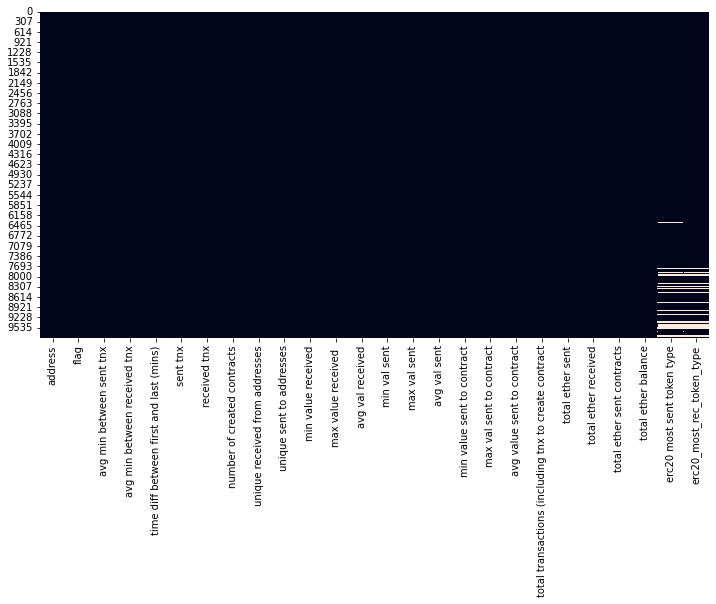

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar = False)
plt.show()

There are still some white portions for the columns `erc20 most sent token type` and `erc20_most_rec_token_type`. These are actually categorical variables, as seen from *Section 2.2.6 Hypothesis 6*.

#### PART 2 ANALYSIS

From *Section 2.2.4 Hypothesis 4 Part 2*, we learnt that there could be some correlation between these columns and the labels. We verified the presence of correlation using the Chi-Square Test in the first code block.

Hence we should not delete the columns as that might cause the model to perform not as well. Thus, we chose imputation of values as our method of dealing with missing values in these two columns.

We are also aware that imputing the modal value can make the data imbalanced if there are a huge number of missing values present in our dataset. However, we have verified that only 9.36% and 9.49% of the values in `erc20 most sent token type` and `erc20_most_rec_token_type` respectively are missing, as shown by the second and third code blocks below.

In [ ]:
# Finding correlation between the two column and `flag` using Chi-Square Test
dfcopy = df[['flag']].copy()
dfcopy[['flag']] = dfcopy[['flag']].astype('category')

contigency = pd.crosstab(df['erc20 most sent token type'], dfcopy['flag'])
c, p, dof, expected = chi2_contingency(contigency)
pvalue = round(p, 5)
print(f'The p-value of the Chi-Square Test for `erc20 most sent token type` and `flag` is {pvalue}.')

contigency = pd.crosstab(df['erc20_most_rec_token_type'], dfcopy['flag'])
c, p, dof, expected = chi2_contingency(contigency)
pvalue = round(p, 5)
print(f'The p-value of the Chi-Square Test for `erc20_most_rec_token_type` and `flag` is {pvalue}.')

The p-value of the Chi-Square Test for `erc20 most sent token type` and `flag` is 0.0.
The p-value of the Chi-Square Test for `erc20_most_rec_token_type` and `flag` is 0.0.


The null hypothesis of the Chi-Square Test is that `erc20 most sent token type`/`erc20_most_rec_token_type` and `flag` are independent. Since the p-values for both Chi-Square Test is 0.0, we have sufficient evidence to reject the null hypothesis at 5% level of significance. Thus we say that both `erc20 most sent token type` and `erc20_most_rec_token_type` are correlated with `flag`.

In [ ]:
# Percentage of missing data in `erc20 most sent token type`
no_of_na = df['erc20 most sent token type'].isnull().sum()
total_no_of_data = df['erc20 most sent token type'].count()
percentage_missing_data = no_of_na/total_no_of_data*100
print(str(round(percentage_missing_data, 2)) + '% of the values in `erc20 most sent token type` are NA values.')

9.36% of the values in `erc20 most sent token type` are NA values.


In [ ]:
# Percentage of missing data in `erc20_most_rec_token_type`
no_of_na = df['erc20_most_rec_token_type'].isnull().sum()
total_no_of_data = df['erc20_most_rec_token_type'].count()
percentage_missing_data = no_of_na/total_no_of_data*100
print(str(round(percentage_missing_data, 2)) + '% of the values in `erc20_most_rec_token_type` are NA values.')

9.49% of the values in `erc20_most_rec_token_type` are NA values.


Thus using the method of imputation to deal with the missing values will not result in an imbalanced dataset.

In [ ]:
# Replace missing categorical variables with the category of the highest frequency
mode_for_most_cat = df['erc20 most sent token type'].mode()[0]
mode_for_rec_cat = df['erc20_most_rec_token_type'].mode()[0]

df['erc20 most sent token type'].fillna(mode_for_most_cat, inplace=True)
df['erc20_most_rec_token_type'].fillna(mode_for_rec_cat, inplace=True)

df['erc20 most sent token type'].replace('\s+', mode_for_most_cat, regex=True, inplace=True)
df['erc20_most_rec_token_type'].replace('\s+', mode_for_rec_cat, regex=True, inplace=True)

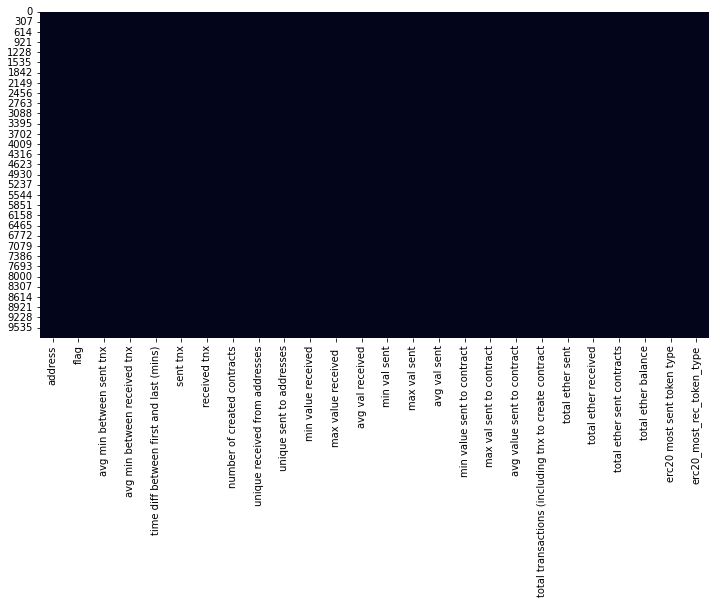

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar = False)
plt.show()

The above heatmap shows that there are no longer any missing values in our dataset.

### 3.6 Changing selected 'object' variables to 'category' type

From *Section 2.2.7 Hypothesis 7*, we deduced that only columns with many repeated values (`erc20 most sent token type` and `erc20_most_rec_token_type`) led to a decrease in memory usage when changed from 'object' to 'category' type.

Conversely, changing the `address` column from 'object' type to 'category' type led to an increase in memory usage as there are very few repeated values in the `address` column.

Hence we would only be changing the type of columns `erc20 most sent token type` and `erc20_most_rec_token_type` from 'object' to 'category' for better memory optimization and computational efficiency, we decided to change the object variables into 'category' Dtype.

In [ ]:
df[['erc20 most sent token type', 'erc20_most_rec_token_type']] = df[['erc20 most sent token type', 'erc20_most_rec_token_type']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 0 to 9840
Data columns (total 26 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   address                                               9823 non-null   object  
 1   flag                                                  9823 non-null   int64   
 2   avg min between sent tnx                              9823 non-null   float64 
 3   avg min between received tnx                          9823 non-null   float64 
 4   time diff between first and last (mins)               9823 non-null   float64 
 5   sent tnx                                              9823 non-null   int64   
 6   received tnx                                          9823 non-null   int64   
 7   number of created contracts                           9823 non-null   int64   
 8   unique received from addresses                  

We notice a decrease in the memory usage of the dataset. The memory usage decreased from 3.8+ MB (as seen in *Section 2.2.6 Hypothesis 6*) to the current 2.2+ MB after converting `erc20 most sent token type` and `erc20_most_rec_token_type` columns to be of type 'category'.

### 3.7 Removing ‘object’/ ‘category’ Variables

To determine whether we should keep the three categorical variables (`address`, `erc20 most sent token type` and `erc20_most_rec_token_type`) or not, we looked further into each of the columns.

In [ ]:
df['erc20 most sent token type'].value_counts()

0               6420
None            1853
EOS              138
OmiseGO          136
Golem            129
                ... 
Nexium             1
DAPSTOKEN          1
DADI               1
Not                1
Litecoin0One       1
Name: erc20 most sent token type, Length: 304, dtype: int64

In [ ]:
df['erc20_most_rec_token_type'].value_counts()

0                        5260
OmiseGO                   870
Blockwell0say0NOTSAFU     779
DATAcoin                  358
Livepeer0Token            205
                         ... 
Kuende0Token                1
KredX0Token                 1
KingOfCandy                 1
Cappasity                   1
yocoinclassic               1
Name: erc20_most_rec_token_type, Length: 466, dtype: int64

For `erc20 most sent token type` and `erc20_most_rec_token_type`, we noticed that more than half of all the rows in the two columns is made up of the value '0'.

Based on our domain knowledge, these two columns are supposed to have values that represent actual names of the token. The value '0' does not mean anything in these two categorical columns.

Hence we will drop these two columns.

In [ ]:
# Dropping `erc20 most sent token type` and `erc20_most_rec_token_type` columns
df.drop(columns=['erc20 most sent token type', 'erc20_most_rec_token_type'], inplace = True)

On the other hand, the `address` column has very few repeated values. Most of its values are unique.




In [ ]:
df['address'].value_counts()

0x4c7520df888aa4569a37ac7d132f89c65821f0af    2
0x4c77f6b01da78d053d5885e43bce5239b623dd3e    2
0x4c7accc2689708892be29256fbe9d45a92f0aa97    2
0x4c271764eadcf0d07e5a937b2de290294c9d11c2    2
0x4cad652b71519a7a68d05dada31122c4c9a5ed95    2
                                             ..
0x57441a8c4ab2bc7afaf1d866d62847ce94fea869    1
0x574800f39a26a2b7975ead18fa6b9c0ea1411493    1
0x575882e95351709861cc985a49c313a4cd314409    1
0x5760802a2efecd24bc98c1fb04d3245c214c1e4d    1
0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c    1
Name: address, Length: 9816, dtype: int64

Therefore, we will use the correlation between the `address` column and `flag` label to determine whether we should keep this variable or not.

In [ ]:
# Chi-Square Test
contigency = pd.crosstab(df['address'], dfcopy['flag'])
c, p, dof, expected = chi2_contingency(contigency)
pvalue = round(p, 5)
print(f'The p-value of the Chi-Square Test is {pvalue}.')

The p-value of the Chi-Square Test is 0.47534.


The null hypothesis of the Chi-Square Test is that `address` and `flag` are independent.

Since the p-value of our Chi-Square Test is 0.47534, we do not have sufficient evidence to reject the null hypothesis at 5% level of significance. This means that the `address` column and `flag` label are not correlated to each other.

Thus we will drop the `address` column.

In [ ]:
df.drop(columns=['address'], inplace = True)

## **4. Balancing the Imbalanced Dataset**

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter

undersample = EditedNearestNeighbours(n_neighbors=3)

train_size=0.8
features = [x for x in df.columns if (x != 'flag')]
unique_values = df.nunique()
features = [x for x in features if x in unique_values.loc[(unique_values>1)]]
X = df[features]
y = df['flag']
counter = Counter(y)
print(counter)
# Apply ENN-all twice
X, y = undersample.fit_resample(X,y)
counter = Counter(y)
print(counter)
X, y = undersample.fit_resample(X,y)
counter = Counter(y)
print(counter)

Counter({0: 7644, 1: 2179})
Counter({0: 6294, 1: 2179})
Counter({0: 6013, 1: 2179})


## **5. Splitting Data into Training, Validation & Test Sets**

In [ ]:
# Split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size = 0.8)

# Split the remaining dataset into validation and test sets
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size = 0.5)

df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 0 to 9840
Data columns (total 22 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   avg min between sent tnx                              9823 non-null   float64
 1   avg min between received tnx                          9823 non-null   float64
 2   time diff between first and last (mins)               9823 non-null   float64
 3   sent tnx                                              9823 non-null   int64  
 4   received tnx                                          9823 non-null   int64  
 5   number of created contracts                           9823 non-null   int64  
 6   unique received from addresses                        9823 non-null   int64  
 7   unique sent to addresses                              9823 non-null   int64  
 8   min value received                                    9823

## **6. Feature Scaling**

Text(0.5, 1.0, 'Distribution of total ether balance')

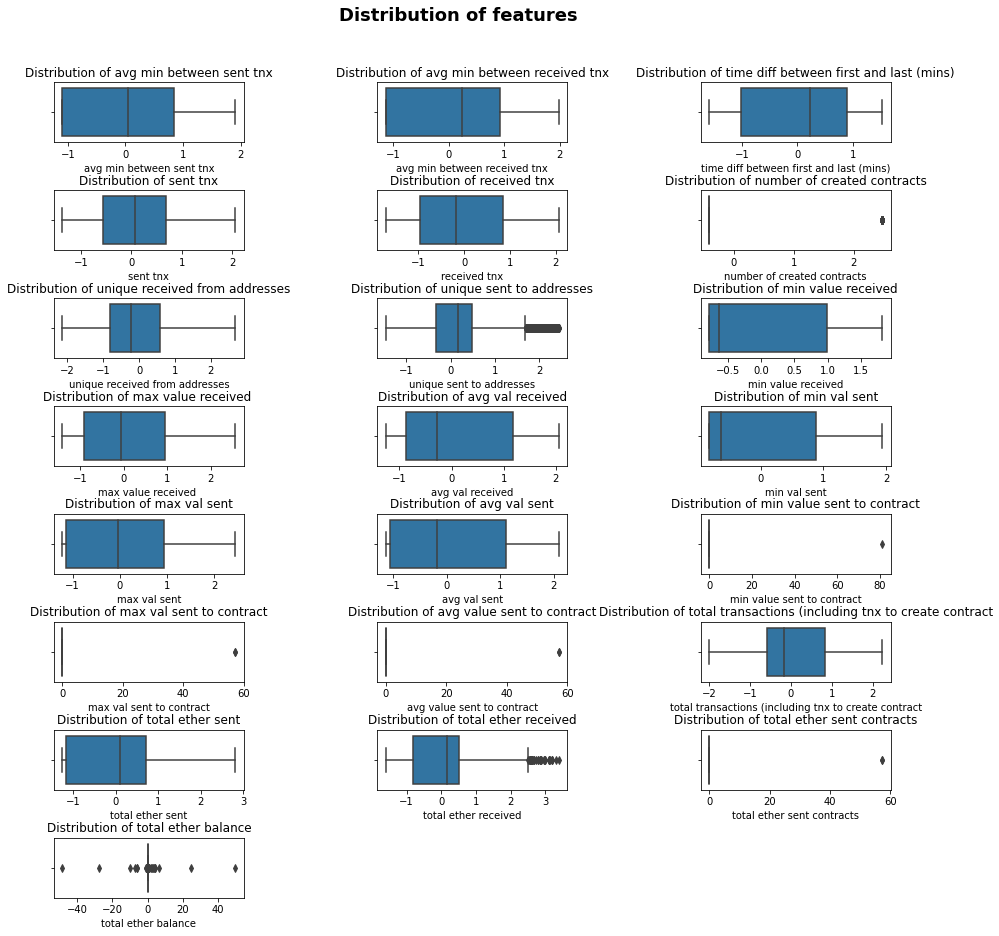

In [ ]:
from sklearn import preprocessing
import numpy as np
# from feature_engine import transformation as vt
from scipy.special import boxcox1p
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
X_train_robust = pt.fit_transform(X_train)
# robust_scaler = preprocessing.RobustScaler()
# X_train_robust = robust_scaler.fit_transform(X_train)

# tf = vt.BoxCoxTransformer(variables = list(X_train.columns))
# X_train_robust = pd.DataFrame()
# for col in X_train:
#   # print(X_train[col])
#   # print(len([num for num in X_train[col] if num < 0]))
#   X_train_robust[col], fitted_lambda = stats.boxcox(X_train[col])

columns = X_train.columns
X_train_robust = pd.DataFrame(data=X_train_robust, columns=columns)

fig, axes = plt.subplots(8, 3, figsize=(15, 15))
fig.delaxes(axes[7][1])
fig.delaxes(axes[7][2])

plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax1 = sns.boxplot(ax = axes[0,0], data=X_train_robust, x=columns[0])
ax1.set_title(f'Distribution of {columns[0]}')

ax2 = sns.boxplot(ax = axes[0,1], data=X_train_robust, x=columns[1])
ax2.set_title(f'Distribution of {columns[1]}')

ax3 = sns.boxplot(ax = axes[0,2], data=X_train_robust, x=columns[2])
ax3.set_title(f'Distribution of {columns[2]}')

ax4 = sns.boxplot(ax = axes[1,0], data=X_train_robust, x=columns[3])
ax4.set_title(f'Distribution of {columns[3]}')

ax5 = sns.boxplot(ax = axes[1,1], data=X_train_robust, x=columns[4])
ax5.set_title(f'Distribution of {columns[4]}')

ax6 = sns.boxplot(ax = axes[1,2], data=X_train_robust, x=columns[5])
ax6.set_title(f'Distribution of {columns[5]}')

ax7 = sns.boxplot(ax = axes[2,0], data=X_train_robust, x=columns[6])
ax7.set_title(f'Distribution of {columns[6]}')

ax8 = sns.boxplot(ax = axes[2,1], data=X_train_robust, x=columns[7])
ax8.set_title(f'Distribution of {columns[7]}')

ax9 = sns.boxplot(ax = axes[2,2], data=X_train_robust, x=columns[8])
ax9.set_title(f'Distribution of {columns[8]}')

ax10 = sns.boxplot(ax = axes[3,0], data=X_train_robust, x=columns[9])
ax10.set_title(f'Distribution of {columns[9]}')

ax11 = sns.boxplot(ax = axes[3,1], data=X_train_robust, x=columns[10])
ax11.set_title(f'Distribution of {columns[10]}')

ax12 = sns.boxplot(ax = axes[3,2], data=X_train_robust, x=columns[11])
ax12.set_title(f'Distribution of {columns[11]}')

ax13 = sns.boxplot(ax = axes[4,0], data=X_train_robust, x=columns[12])
ax13.set_title(f'Distribution of {columns[12]}')

ax14 = sns.boxplot(ax = axes[4,1], data=X_train_robust, x=columns[13])
ax14.set_title(f'Distribution of {columns[13]}')

ax15 = sns.boxplot(ax = axes[4,2], data=X_train_robust, x=columns[14])
ax15.set_title(f'Distribution of {columns[14]}')

ax16 = sns.boxplot(ax = axes[5,0], data=X_train_robust, x=columns[15])
ax16.set_title(f'Distribution of {columns[15]}')

ax17 = sns.boxplot(ax = axes[5,1], data=X_train_robust, x=columns[16])
ax17.set_title(f'Distribution of {columns[16]}')

ax18 = sns.boxplot(ax = axes[5,2], data=X_train_robust, x=columns[17])
ax18.set_title(f'Distribution of {columns[17]}')

ax19 = sns.boxplot(ax = axes[6,0], data=X_train_robust, x=columns[18])
ax19.set_title(f'Distribution of {columns[18]}')

ax20 = sns.boxplot(ax = axes[6,1], data=X_train_robust, x=columns[19])
ax20.set_title(f'Distribution of {columns[19]}')

ax21 = sns.boxplot(ax = axes[6,2], data=X_train_robust, x=columns[20])
ax21.set_title(f'Distribution of {columns[20]}')

ax22 = sns.boxplot(ax = axes[7,0], data=X_train_robust, x=columns[21])
ax22.set_title(f'Distribution of {columns[21]}')

## **7. Feature Selection**

### 7.1 Removing Highly Correlated Features

We created a correlation matrix to determine the correlation between the features in our dataset.

In [ ]:
X_train_robust.corr()

,avg min between sent tnx,avg min between received tnx,time diff between first and last (mins),sent tnx,received tnx,number of created contracts,unique received from addresses,unique sent to addresses,min value received,max value received,...,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total ether sent,total ether received,total ether sent contracts,total ether balance
avg min between sent tnx,1.000000,0.275067,0.394665,0.707605,0.221315,-0.402069,0.321716,0.735808,0.073425,0.316545,...,0.449712,0.306981,-0.000042,0.012504,0.012504,0.339541,0.520363,0.294063,0.012504,-0.017657
avg min between received tnx,0.275067,1.000000,0.868339,0.311370,0.682038,0.294260,0.570149,0.114392,-0.606085,-0.130112,...,-0.190896,-0.333503,-0.005230,0.003866,0.003866,0.634073,-0.052205,0.108399,0.003866,-0.000737
time diff between first and last (mins),0.394665,0.868339,1.000000,0.470935,0.820268,0.270924,0.660829,0.259244,-0.554287,-0.027585,...,-0.070196,-0.252616,0.008280,0.018330,0.018330,0.817884,0.096599,0.270016,0.018330,-0.005581
sent tnx,0.707605,0.311370,0.470935,1.000000,0.431816,-0.494044,0.420753,0.846614,0.008041,0.382030,...,0.552349,0.322853,0.025146,0.032049,0.032049,0.585937,0.733622,0.470059,0.032049,-0.054979
received tnx,0.221315,0.682038,0.820268,0.431816,1.000000,0.349554,0.790891,0.200042,-0.486006,0.106692,...,0.045660,-0.131647,0.024662,0.028209,0.028209,0.956947,0.218063,0.500337,0.028209,0.027581
number of created contracts,-0.402069,0.294260,0.270924,-0.494044,0.349554,1.000000,0.170535,-0.529558,-0.298121,-0.156329,...,-0.456611,-0.441422,0.030452,0.043115,0.043115,0.271480,-0.469500,0.047622,0.043115,0.030590
unique received from addresses,0.321716,0.570149,0.660829,0.420753,0.790891,0.170535,1.000000,0.384820,-0.329381,0.296499,...,0.245531,0.107753,0.032578,0.036369,0.036369,0.773666,0.318777,0.488443,0.036369,0.037905
unique sent to addresses,0.735808,0.114392,0.259244,0.846614,0.200042,-0.529558,0.384820,1.000000,0.198061,0.475125,...,0.643594,0.478474,0.029368,0.037401,0.037401,0.373393,0.718969,0.425769,0.037401,-0.060024
min value received,0.073425,-0.606085,-0.554287,0.008041,-0.486006,-0.298121,-0.329381,0.198061,1.000000,0.585874,...,0.593463,0.723010,-0.009587,-0.013573,-0.013573,-0.361429,0.459698,0.328960,-0.013573,-0.015748
max value received,0.316545,-0.130112,-0.027585,0.382030,0.106692,-0.156329,0.296499,0.475125,0.585874,1.000000,...,0.862380,0.810428,0.016893,0.005749,0.005749,0.226287,0.805648,0.871226,0.005749,0.009626


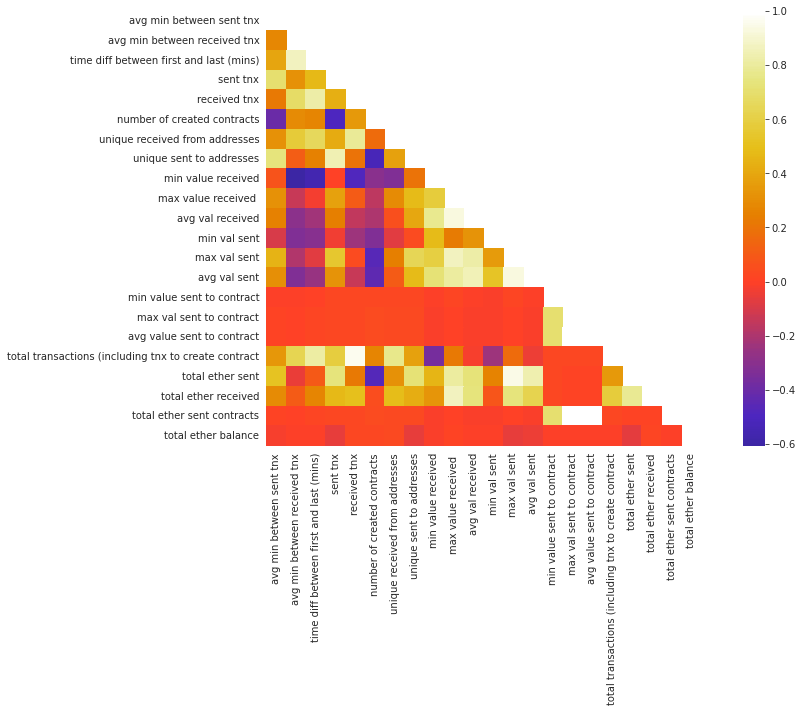

In [ ]:
corr = X_train_robust.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize = (15, 8))
    sns.heatmap(corr,  mask = mask, annot = False, cmap = 'CMRmap', center = 0, square = True)

Based on the correlation matrix, we noticed that there are several variables that are very highly correlated with each other. We define 'very highly correlated' as correlation coefficients that are between 0.95 and 1.0 (inclusive).

In [ ]:
corr_mat = X_train_robust.corr(method='pearson')
upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
abs_unique_corr_pairs = abs(unique_corr_pairs)
sorted_mat = abs_unique_corr_pairs.sort_values()
print(sorted_mat)

min value sent to contract                            avg min between sent tnx      0.000042
total ether balance                                   total ether sent contracts    0.000104
                                                      avg value sent to contract    0.000104
                                                      max val sent to contract      0.000104
                                                      min value sent to contract    0.000143
                                                                                      ...   
total ether sent                                      max val sent                  0.948708
total transactions (including tnx to create contract  received tnx                  0.956947
total ether sent contracts                            avg value sent to contract    1.000000
                                                      max val sent to contract      1.000000
avg value sent to contract                            max val sent to 

In [ ]:
# Extracting very highly correlated variables
sorted_mat[sorted_mat >= 0.95]

total transactions (including tnx to create contract  received tnx                  0.956947
total ether sent contracts                            avg value sent to contract    1.000000
                                                      max val sent to contract      1.000000
avg value sent to contract                            max val sent to contract      1.000000
dtype: float64

In [ ]:
# Removing variables that are very highly correlated with each other
highly_related_variables = ['avg value sent to contract', 'max val sent to contract', 'total ether sent contracts', 'received tnx']
X_train_robust.drop(highly_related_variables, axis=1, inplace=True)
X_test.drop(highly_related_variables, axis=1, inplace=True)
X_valid.drop(highly_related_variables, axis=1, inplace=True)

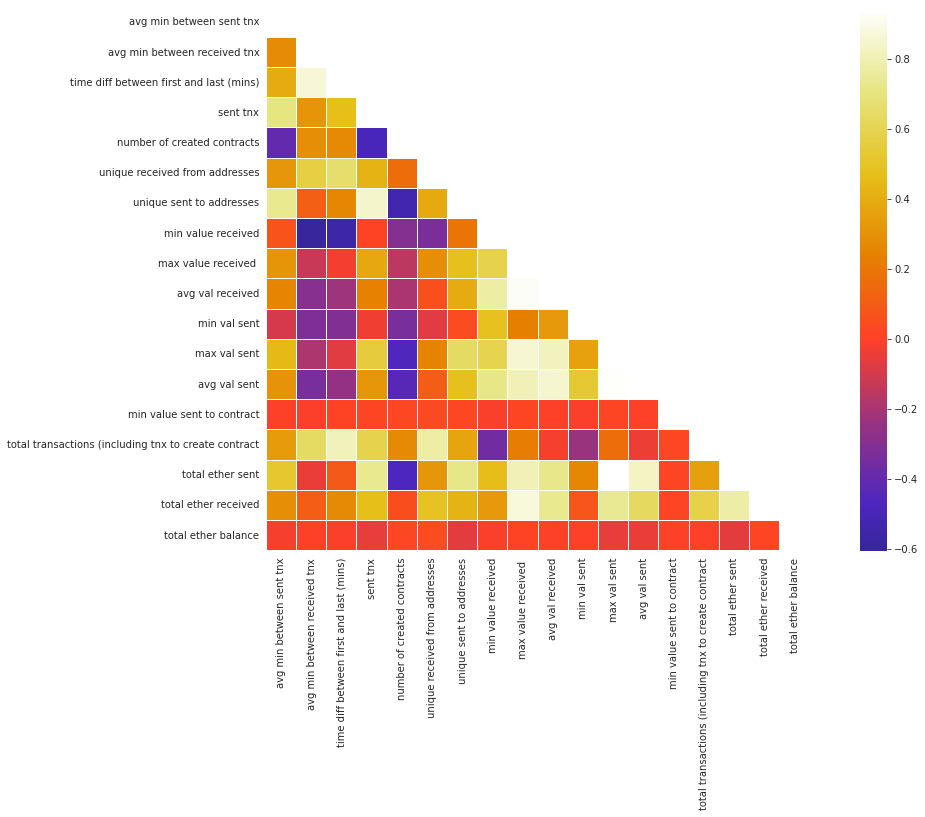

In [ ]:
# Recheck the correlation matrix
new_corr = X_train_robust.corr()

mask = np.zeros_like(new_corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(new_corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

### 7.2 Removing Features with a Small Distribution

In [ ]:
# Features that have a small distribution
for i in X_train_robust.columns:
    if len(X_train_robust[i].value_counts()) < 10:
        print(f'The column `{i}` has the following distribution: \n{X_train_robust[i].value_counts()}')
        print('======================================')

The column `min value sent to contract` has the following distribution: 
-0.012354     6552
 80.944425       1
Name: min value sent to contract, dtype: int64


In [ ]:
# Removing the feature with a small distribution
small_distri_column = ['min value sent to contract']
X_train_robust.drop(small_distri_column, axis=1, inplace=True)
X_test.drop(small_distri_column, axis=1, inplace=True)
X_valid.drop(small_distri_column, axis=1, inplace=True)
print(X_train_robust.shape)
X_train_robust.head()

(6553, 17)


,avg min between sent tnx,avg min between received tnx,time diff between first and last (mins),sent tnx,number of created contracts,unique received from addresses,unique sent to addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total ether sent,total ether received,total ether balance
0,-1.093212,-1.130999,0.821360,-0.555142,-0.405665,-0.815732,-0.332814,0.437180,-0.759049,-0.388517,1.168562,-0.623098,-0.317076,-0.980863,-0.777489,-1.112385,0.000324
1,-1.093212,-1.130999,-0.902422,-0.555142,-0.405665,-0.815732,-0.332814,0.049376,-0.999661,-0.700001,0.667220,-0.844847,-0.615281,-0.980863,-0.959817,-1.298214,0.000324
2,-1.093212,0.781403,1.177754,-1.366796,2.464941,0.731935,-1.467211,-0.777766,-0.429489,-0.493256,-0.821756,-1.214151,-1.143456,1.356576,-1.256859,0.904641,0.002121
3,-1.093212,-1.130999,-1.311947,-1.366796,2.464941,-0.815732,-1.467211,0.711362,-0.556462,-0.139542,-0.821756,-1.214151,-1.143456,-0.980863,-1.256859,-0.951101,0.000341
4,-1.093212,1.105281,0.626433,-0.555142,-0.405665,-0.215984,-0.332814,-0.612960,-0.906807,-0.811523,0.955969,-0.729314,-0.458127,-0.752391,-0.865215,-1.201913,0.000324


Text(0.5, 1.0, 'Distribution of total ether balance')

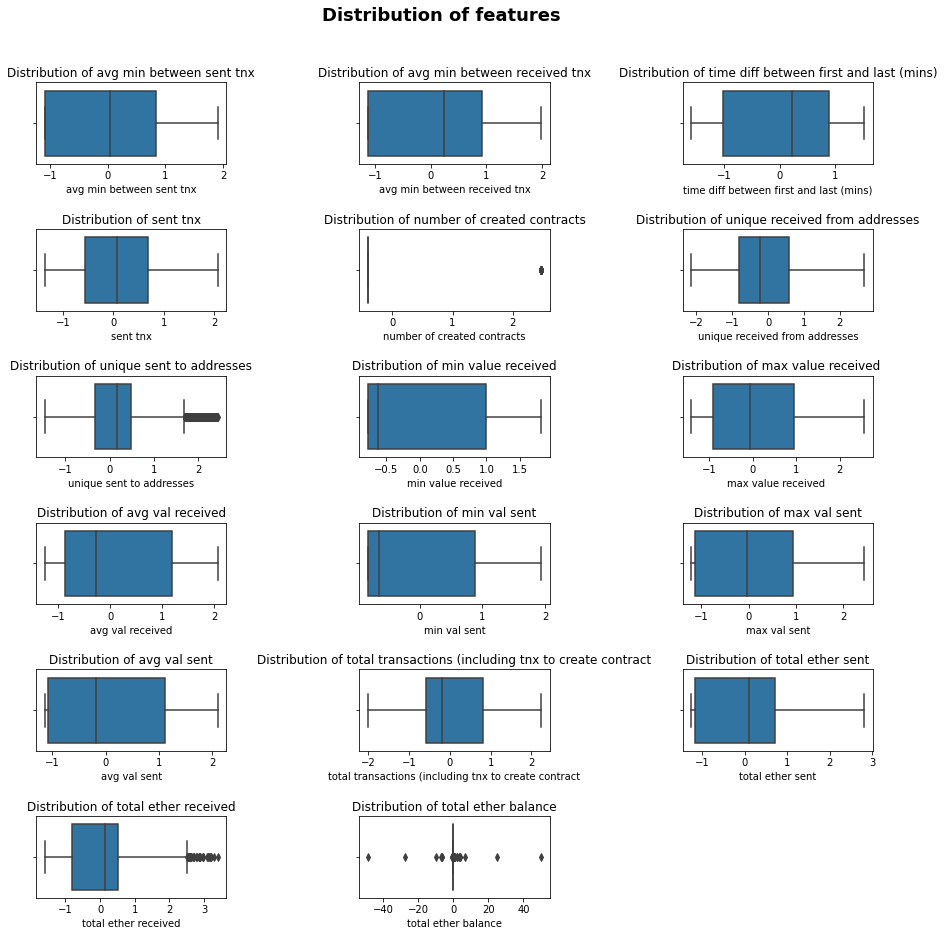

In [ ]:
# Distribution of final features
columns = X_train_robust.columns
fig, axes = plt.subplots(6, 3, figsize=(15, 15))
fig.delaxes(axes[5][2])

plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax1 = sns.boxplot(ax = axes[0,0], data=X_train_robust, x=columns[0])
ax1.set_title(f'Distribution of {columns[0]}')

ax2 = sns.boxplot(ax = axes[0,1], data=X_train_robust, x=columns[1])
ax2.set_title(f'Distribution of {columns[1]}')

ax3 = sns.boxplot(ax = axes[0,2], data=X_train_robust, x=columns[2])
ax3.set_title(f'Distribution of {columns[2]}')

ax4 = sns.boxplot(ax = axes[1,0], data=X_train_robust, x=columns[3])
ax4.set_title(f'Distribution of {columns[3]}')

ax5 = sns.boxplot(ax = axes[1,1], data=X_train_robust, x=columns[4])
ax5.set_title(f'Distribution of {columns[4]}')

ax6 = sns.boxplot(ax = axes[1,2], data=X_train_robust, x=columns[5])
ax6.set_title(f'Distribution of {columns[5]}')

ax7 = sns.boxplot(ax = axes[2,0], data=X_train_robust, x=columns[6])
ax7.set_title(f'Distribution of {columns[6]}')

ax8 = sns.boxplot(ax = axes[2,1], data=X_train_robust, x=columns[7])
ax8.set_title(f'Distribution of {columns[7]}')

ax9 = sns.boxplot(ax = axes[2,2], data=X_train_robust, x=columns[8])
ax9.set_title(f'Distribution of {columns[8]}')

ax10 = sns.boxplot(ax = axes[3,0], data=X_train_robust, x=columns[9])
ax10.set_title(f'Distribution of {columns[9]}')

ax11 = sns.boxplot(ax = axes[3,1], data=X_train_robust, x=columns[10])
ax11.set_title(f'Distribution of {columns[10]}')

ax12 = sns.boxplot(ax = axes[3,2], data=X_train_robust, x=columns[11])
ax12.set_title(f'Distribution of {columns[11]}')

ax13 = sns.boxplot(ax = axes[4,0], data=X_train_robust, x=columns[12])
ax13.set_title(f'Distribution of {columns[12]}')

ax14 = sns.boxplot(ax = axes[4,1], data=X_train_robust, x=columns[13])
ax14.set_title(f'Distribution of {columns[13]}')

ax15 = sns.boxplot(ax = axes[4,2], data=X_train_robust, x=columns[14])
ax15.set_title(f'Distribution of {columns[14]}')

ax16 = sns.boxplot(ax = axes[5,0], data=X_train_robust, x=columns[15])
ax16.set_title(f'Distribution of {columns[15]}')

ax17 = sns.boxplot(ax = axes[5,1], data=X_train_robust, x=columns[16])
ax17.set_title(f'Distribution of {columns[16]}')

# **B. Fraud Analytics Models**

## **1. Logistic Regression**

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix, recall_score, log_loss

class LogisticRegressionEstimator:
  def __init__(self, x_train, y_train, x_validation, y_validation, x_test, y_test):
    self.x_train = x_train
    self.y_train = y_train
    self.x_validation = x_validation
    self.y_validation = y_validation
    self.x_test = x_test
    self.y_test = y_test

  def fit_model(self):
    """
    Returns fitted logistic regression model object
    """
    lr = LogisticRegression()
    lr.fit(self.x_train, self.y_train)
    return lr

  def display_model_performance(self, test_type, output_training=False):
    """
    Displays confusion matrix, AUC, Accuracy, Precision and recall
    after testing model on validation or testing dataset

    Parameters
    ==========
    model
      Fitted logistic regression model
    test_type
      Specify whether to use validation or test dataset
    """
    # Fit model
    model = self.fit_model()
    y_train = self.y_train
    x_train = self.x_train

    if output_training:
      #Training Score
      y_train_hat = model.predict(x_train)
      y_train_hat_probs = model.predict_proba(x_train)[:,1]

      train_accuracy = accuracy_score(y_train, y_train_hat)*100
      train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
      train_log_loss = log_loss(y_train, y_train_hat)

      print('Training Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
      print('Training AUC: %.4f %%' % train_auc_roc)
      print('Training accuracy: %.4f %%' % train_accuracy)
      print('Training Log Loss: ', train_log_loss)
      print('Training Classification report:\n', classification_report(y_train, y_train_hat, digits=6))

    else:
      #Model validation
      x_test = self.x_validation if test_type == 'validation' else self.x_test
      y_test = self.y_validation if test_type == 'validation' else self.y_test

      y_test_hat = model.predict(x_test)
      y_test_probs = model.predict_proba(x_test)[:,1]

      test_accuracy = accuracy_score(y_test, y_test_hat)*100
      test_auc_roc = roc_auc_score(y_test, y_test_probs)*100
      test_log_loss = log_loss(y_test, y_test_hat)


      print(f'{test_type} Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
      print(f'{test_type} AUC: %.4f %%' % test_auc_roc)
      print(f'{test_type} accuracy: %.4f %%' % test_accuracy)
      print(f'{test_type} Log Loss: ', test_log_loss)
      print(f'{test_type} Classification report:\n', classification_report(y_test, y_test_hat, digits=6))

We first train our baseline model which will be used as a benchmark to compare the performance of more complex models. <br>

Our baseline model is a logistic regression model which uses all features from our training dataset after feature engineering was performed

In [ ]:
%%time
lr_estimator = LogisticRegressionEstimator(X_train_robust, y_train, X_valid, y_valid, X_test, y_test)
lr_estimator.display_model_performance(test_type = "test", output_training=True)

Training Confusion matrix:
 [[4543  279]
 [ 296 1435]]
Training AUC: 96.1511 %
Training accuracy: 91.2254 %
Training Log Loss:  3.0306759521984845
Training Classification report:
               precision    recall  f1-score   support

           0   0.938830  0.942140  0.940482      4822
           1   0.837223  0.829001  0.833091      1731

    accuracy                       0.912254      6553
   macro avg   0.888027  0.885570  0.886787      6553
weighted avg   0.911990  0.912254  0.912115      6553

CPU times: user 219 ms, sys: 171 ms, total: 390 ms
Wall time: 494 ms


In [ ]:
%%time
lr_estimator = LogisticRegressionEstimator(X_train_robust, y_train, X_valid, y_valid, X_test, y_test)
lr_estimator.display_model_performance(test_type = "validation", output_training=False)

validation Confusion matrix:
 [[124 467]
 [ 71 157]]
validation AUC: 47.5094 %
validation accuracy: 34.3101 %
validation Log Loss:  22.688931761247677
validation Classification report:
               precision    recall  f1-score   support

           0   0.635897  0.209814  0.315522       591
           1   0.251603  0.688596  0.368545       228

    accuracy                       0.343101       819
   macro avg   0.443750  0.449205  0.342033       819
weighted avg   0.528914  0.343101  0.330283       819

CPU times: user 156 ms, sys: 109 ms, total: 265 ms
Wall time: 142 ms


In [ ]:
%%time
lr_estimator = LogisticRegressionEstimator(X_train_robust, y_train, X_valid, y_valid, X_test, y_test)
lr_estimator.display_model_performance(test_type = "test", output_training=False)

test Confusion matrix:
 [[105 495]
 [ 65 155]]
test AUC: 46.2466 %
test accuracy: 31.7073 %
test Log Loss:  23.587939733997473
test Classification report:
               precision    recall  f1-score   support

           0   0.617647  0.175000  0.272727       600
           1   0.238462  0.704545  0.356322       220

    accuracy                       0.317073       820
   macro avg   0.428054  0.439773  0.314525       820
weighted avg   0.515914  0.317073  0.295155       820

CPU times: user 160 ms, sys: 114 ms, total: 273 ms
Wall time: 153 ms


### 1.1 Recursive Feature Elimination

Recursive Feature Elimination was used to improve the model performance for logistic regression by selecting the k most relevant features in our training data, where k is the target number of features to select.

We first determined the optimal value of k using the RFESimulator class by finding the value of k which returns the model that gives the highest recall using the validation dataset.

In [ ]:
from sklearn.feature_selection import RFE
class RFESimulator:
  def __init__(self, x_train, y_train, x_valid, y_valid):
    self.x_train = x_train
    self.y_train = y_train
    self.x_valid = x_valid
    self.y_valid = y_valid

  def get_selected_features(self, n):

    """
    Use RFE algorithm to return the n most relevant columns from training data
    """
    model = LogisticRegression(max_iter = 10000)
    rfe = RFE(model,n_features_to_select=n)
    fit = rfe.fit(self.x_train, self.y_train)
    selected_columns = []

    for i in range(len(fit.support_)) :
      if fit.support_[i] == True:
        selected_columns.append(self.x_train.columns[i])
    return selected_columns

  def get_optimum_n_features(self, limit):
    """
    Returns the optimal number of features, n, which is a hyper-parameter
    for the RFE algorithm, which is used to select the n most important
    features in the dataset to be used in the logistic regression model

    This function loops through the range specified and for each value of
    n, generates a set of selected features which is used in the logistic
    regression model.

    The optimal value of n is decided by comparing the model accuracies when
    different values of n are used

    Parameters
    ==========
    limit
      The maximum number of features that RFE algorithm can select from dataset
    """
    optimal_recall = 0
    optimal_n = 0
    optimal_selected_features = []
    for i in range(1, limit + 1):
      # Get selected features
      selected_features = self.get_selected_features(i)
      # Drop features in training and test data
      selected_x_train = self.x_train[selected_features]
      selected_x_valid = self.x_valid[selected_features]

      # Train logistic regression model
      lr = LogisticRegression()
      lr.fit(selected_x_train, self.y_train)

      # Evaluate model performance
      y_predicted = lr.predict(selected_x_valid)
      recall = recall_score(self.y_valid, y_predicted)
      output_log_loss = log_loss(self.y_valid, y_predicted)
      print("Number of features selected: ", i)
      print("Selected features: ", selected_features)
      print("Recall: " ,recall)
      print("Log Loss: ", output_log_loss)
      print("=================")
      # Replace optimal n if accuracy is higher
      if recall > optimal_recall:
        optimal_recall = recall
        optimal_n = i
        optimal_selected_features = selected_features

    return optimal_n, optimal_selected_features

In [ ]:
# Run RFE with training and test data
rfe_simulator = RFESimulator(X_train_robust, y_train, X_valid, y_valid)
optimum_n, optimal_selected_features  = rfe_simulator.get_optimum_n_features(len(X_train_robust.columns))
print("Optimal Number of selected features for RFE: ", optimum_n)
print("Selected features: ", optimal_selected_features)

Number of features selected:  1
Selected features:  ['total transactions (including tnx to create contract']
Recall:  0.0
Log Loss:  9.615190498216894
Number of features selected:  2
Selected features:  ['unique received from addresses', 'total transactions (including tnx to create contract']
Recall:  0.0
Log Loss:  9.615190498216894
Number of features selected:  3
Selected features:  ['unique received from addresses', 'avg val received', 'total transactions (including tnx to create contract']
Recall:  0.0
Log Loss:  9.615190498216894
Number of features selected:  4
Selected features:  ['unique received from addresses', 'max value received ', 'avg val received', 'total transactions (including tnx to create contract']
Recall:  0.017543859649122806
Log Loss:  11.512973304132718
Number of features selected:  5
Selected features:  ['unique received from addresses', 'max value received ', 'avg val received', 'total transactions (including tnx to create contract', 'total ether sent']
Recall:

Since selecting the top 14 features using RFE gave us the highest recall, we trained a logistic regression using these 14 features and output the results.

In [ ]:
%%time
# Train logistic regression model using selected features from RFE
X_train_robust_rfe = X_train_robust[optimal_selected_features]
X_valid_rfe = X_valid[optimal_selected_features]
X_test_rfe = X_test[optimal_selected_features]
lr_estimator_rfe = LogisticRegressionEstimator(X_train_robust_rfe, y_train, X_valid_rfe, y_valid, X_test_rfe, y_test)
lr_estimator_rfe.display_model_performance(test_type = "test", output_training=True)
lr_estimator_rfe.display_model_performance(test_type = "validation", output_training=False)
lr_estimator_rfe.display_model_performance(test_type = "test", output_training=False)

Training Confusion matrix:
 [[4546  276]
 [ 295 1436]]
Training AUC: 96.1512 %
Training accuracy: 91.2864 %
Training Log Loss:  3.0095928598176007
Training Classification report:
               precision    recall  f1-score   support

           0   0.939062  0.942762  0.940909      4822
           1   0.838785  0.829578  0.834156      1731

    accuracy                       0.912864      6553
   macro avg   0.888924  0.886170  0.887532      6553
weighted avg   0.912574  0.912864  0.912710      6553

validation Confusion matrix:
 [[125 466]
 [ 71 157]]
validation AUC: 47.6304 %
validation accuracy: 34.4322 %
validation Log Loss:  22.646758896788164
validation Classification report:
               precision    recall  f1-score   support

           0   0.637755  0.211506  0.317662       591
           1   0.252006  0.688596  0.368978       228

    accuracy                       0.344322       819
   macro avg   0.444881  0.450051  0.343320       819
weighted avg   0.530367  0.344322  

We also trained another logistic regression model which selected the top 5 features using RFE as a comparison.

In [ ]:
%%time
top_5_features = ['unique received from addresses', 'max value received ', 'avg val received', 'max val sent', 'total transactions (including tnx to create contract']

X_train_robust_rfe = X_train_robust[top_5_features]
X_valid_rfe = X_valid[top_5_features]
X_test_rfe = X_test[top_5_features]
lr_estimator_rfe = LogisticRegressionEstimator(X_train_robust_rfe, y_train, X_valid_rfe, y_valid, X_test_rfe, y_test)
lr_estimator_rfe.display_model_performance(test_type = "test", output_training=True)
lr_estimator_rfe.display_model_performance(test_type = "validation", output_training=False)
lr_estimator_rfe.display_model_performance(test_type = "test", output_training=False)

Training Confusion matrix:
 [[4501  321]
 [ 319 1412]]
Training AUC: 95.5514 %
Training accuracy: 90.2335 %
Training Log Loss:  3.3732753797524695
Training Classification report:
               precision    recall  f1-score   support

           0   0.933817  0.933430  0.933624      4822
           1   0.814772  0.815713  0.815242      1731

    accuracy                       0.902335      6553
   macro avg   0.874295  0.874572  0.874433      6553
weighted avg   0.902371  0.902335  0.902353      6553

validation Confusion matrix:
 [[525  66]
 [225   3]]
validation AUC: 74.9777 %
validation accuracy: 64.4689 %
validation Log Loss:  12.272083888094508
validation Classification report:
               precision    recall  f1-score   support

           0   0.700000  0.888325  0.782998       591
           1   0.043478  0.013158  0.020202       228

    accuracy                       0.644689       819
   macro avg   0.371739  0.450741  0.401600       819
weighted avg   0.517232  0.644689  

## **2. XGBoost Algorithm**

In [ ]:
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, log_loss

xgb_model = XGBClassifier()
xgb_model.fit(X_train_robust, y_train)
y_pred = xgb_model.predict(X_test)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall is {:.6f}'.format(recall))

Recall is 0.288557


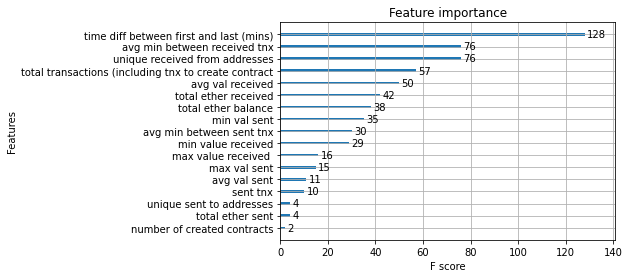

Number of features selected 1
Recall is 0.000000
Number of features selected 2
Recall is 0.000000
Number of features selected 3
Recall is 0.000000
Number of features selected 4
Recall is 0.000000
Number of features selected 5
Recall is 0.012500
Number of features selected 6
Recall is 0.375000
Number of features selected 7
Recall is 0.212500
Number of features selected 8
Recall is 0.212500
Number of features selected 9
Recall is 0.000000
Number of features selected 10
Recall is 0.000000
Number of features selected 11
Recall is 0.000000
Number of features selected 12
Recall is 0.000000
Number of features selected 13
Recall is 0.000000
Number of features selected 14
Recall is 0.220833
Number of features selected 15
Recall is 0.237500
Number of features selected 16
Recall is 0.233333
Number of features selected 17
Recall is 0.237500


In [ ]:
#Feature importance classification for Xgboost model
from sklearn.metrics import log_loss

xgb_model = XGBClassifier()
xgb_model.fit(X_train_robust, y_train)
plot_importance(xgb_model)
pyplot.show()

for i in range(1,len(X_train_robust.columns)+1):
  feature_importance = xgb_model.feature_importances_
  sorted_idx = np.argsort(feature_importance)
  topfeatures = sorted_idx[:i]

  #Get the features for the XG boost feature importance method
  x_valid_xgboost = X_valid.iloc[:,topfeatures]
  X_train_drop = X_train_robust.iloc[:,topfeatures]

  #train the model
  improved_xgb_model = XGBClassifier()
  improved_xgb_model.fit(X_train_drop, y_train)

  print ('Number of features selected {:n}'.format(i))
  y_pred = improved_xgb_model.predict(x_valid_xgboost)
  recall = recall_score(y_valid, y_pred, average='binary')
  print('Recall is {:.6f}'.format(recall))

In [ ]:
%%time
#Get the features for the XG boost feature importance method
optimal_number = 6

xgb_model = XGBClassifier()
xgb_model.fit(X_train_robust, y_train)
feature_importance = xgb_model.feature_importances_

topfeatures = sorted_idx[:optimal_number]
x_train_xgboost_optimal = X_train_robust.iloc[:,topfeatures]

optimal_xgb_model = XGBClassifier()
optimal_xgb_model.fit(x_train_xgboost_optimal, y_train)

y_pred = optimal_xgb_model.predict(X_train_robust.iloc[:,topfeatures])
recall_train = recall_score(y_train, y_pred, average='binary')
loss_train = log_loss(y_train, y_pred)

y_pred = optimal_xgb_model.predict(X_test.iloc[:,topfeatures])
recall_test = recall_score(y_test, y_pred, average='binary')
loss_test = log_loss(y_test, y_pred)

y_pred = optimal_xgb_model.predict(X_valid.iloc[:,topfeatures])
recall_valid = recall_score(y_valid, y_pred, average='binary')
loss_valid = log_loss(y_valid, y_pred)


print('Recall for training data is {:.6f}'.format(recall_train))
print('Recall for testing data is {:.6f}'.format(recall_test))
print('Recall for validation data is {:.6f}'.format(recall_valid))

print('Loss score for training data is {:.6f}'.format(loss_train))
print('Loss score for testing data is {:.6f}'.format(loss_test))
print('Loss score for validation data is {:.6f}'.format(loss_valid))


Recall for training data is 0.691024
Recall for testing data is 0.412935
Recall for validation data is 0.375000
Loss score for training data is 4.712033
Loss score for testing data is 8.887508
Loss score for validation data is 10.922625
CPU times: user 972 ms, sys: 2.63 ms, total: 974 ms
Wall time: 975 ms


## **3. Fully-Connected Neural Network**

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from sklearn.model_selection import RandomizedSearchCV
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Flatten, Dense, Dropout, Activation
from keras.optimizers import Adam
from sklearn.metrics import r2_score as r2, confusion_matrix, accuracy_score, recall_score, make_scorer, precision_score

Model 1 (Before Tuning Hyperparameters)

In [ ]:
%%time
#Hyperparameters: Number of hidden nodes = 100, Number of epochs = 30, Batch size = 64

# number of hidden nodes
H = 100
# input dimension
input_dim = X_train_robust.shape[1]
# num of epochs
num_epochs = 30

# create sequential multi-layer perceptron
nn_model = Sequential()
# layer 0
nn_model.add(layers.Input(shape=(input_dim,)))

# layer 1
nn_model.add(layers.Dense(H, activation='relu'))

#output layer
nn_model.add(layers.Dense(1, activation='sigmoid'))

# configure the model
nn_model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy', tf.keras.metrics.Recall()])
# fit the model
history = nn_model.fit(X_train_robust, y_train, batch_size=64, epochs=num_epochs, verbose=0)

#Compute recall score and loss for train, validation and test dataset
train_score = nn_model.evaluate(X_train_robust, y_train, verbose=0)
print('Train loss:', train_score[0])

val_score = nn_model.evaluate(X_valid, y_valid, verbose=0)
print('Validation loss:', val_score[0])

test_score = nn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score[0])

y_pred_train = (nn_model.predict(X_train_robust) > 0.5).astype("int32")
yhat_probs_train = y_pred_train[:, 0]
print('Train Recall:' , recall_score(y_train, yhat_probs_train, average="macro"))

y_pred_valid = (nn_model.predict(X_valid) > 0.5).astype("int32")
yhat_probs_valid = y_pred_valid[:, 0]
print('Validation Recall:' , recall_score(y_valid, yhat_probs_valid, average="macro"))

y_pred_test = (nn_model.predict(X_test) > 0.5).astype("int32")
yhat_probs_test = y_pred_test[:, 0]
print('Test Recall:' , recall_score(y_test, yhat_probs_test, average="macro"))

Train loss: 0.089384526014328
Validation loss: 100720.5078125
Test loss: 72409.5234375
205/205 [==============================] - 0s 1ms/step
Train Recall: 0.9548294969092319
26/26 [==============================] - 0s 1ms/step
Validation Recall: 0.6053864421416235
26/26 [==============================] - 0s 2ms/step
Test Recall: 0.6434708525225248
CPU times: user 8.79 s, sys: 519 ms, total: 9.31 s
Wall time: 7.86 s


Tuning Hyperparameters with RandomizedSearchCV

In [ ]:
%%time

input_shape = X_train_robust.shape[1]

def get_mlp_model(hiddenLayerOne=784,
  dropout=0.2, learnRate=0.01):
	# initialize a sequential model and add layer to flatten the
	# input data
  model = Sequential()
  model.add(Dense(hiddenLayerOne, activation="relu",
		input_shape=(input_shape,)))

	# output layer
  model.add(layers.Dense(1, activation="sigmoid"))

	# compile the model
  model.compile(
		loss="binary_crossentropy",
    optimizer = "adam",
    metrics=[tf.keras.metrics.Recall()])
	# return compiled model
  return model

# wrap our model into a scikit-learn compatible classifier
print("[INFO] initializing model...")
tuning_model = KerasClassifier(build_fn=get_mlp_model, verbose=0)

hiddenLayerOne = [100, 300, 500]
batchSize = [32, 64, 128, 256]
epochs = [10, 20, 30, 40, 50]

# create a dictionary from the hyperparameter grid
grid = dict(
	hiddenLayerOne=hiddenLayerOne,
	batch_size=batchSize,
	epochs=epochs
)

# initialize a random search with a 3-fold cross-validation and then
# start the hyperparameter search process
print("[INFO] performing random search...")
scorer = make_scorer(recall_score)
searcher = RandomizedSearchCV(estimator=tuning_model, n_jobs=-1, cv=3,
	param_distributions=grid, scoring=scorer)
searchResults = searcher.fit(X_train_robust, y_train)
# summarize grid search information
bestScore = searchResults.best_score_
bestParams = searchResults.best_params_
print("[INFO] best score is {:.2f} using {}".format(bestScore,
	bestParams))


[INFO] initializing model...
[INFO] performing random search...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


[INFO] best score is 0.93 using {'hiddenLayerOne': 500, 'epochs': 30, 'batch_size': 64}
CPU times: user 10.9 s, sys: 783 ms, total: 11.7 s
Wall time: 2min 45s


Model 2 (After Tuning Hyperparameters)

In [ ]:
%%time

# Using hyperparameters: Number of hidden nodes = 100, Number of epochs = 40, Batch size = 32

#number of hidden nodes
H = 300
# input dimension
input_dim = X_train_robust.shape[1]
# num of epochs
num_epochs = 40

# create sequential multi-layer perceptron
nn_model2 = Sequential()
# layer 0
nn_model2.add(layers.Input(shape=(input_dim,)))

# layer 1
nn_model2.add(layers.Dense(H, activation='relu'))

#output layer
nn_model2.add(layers.Dense(1, activation='sigmoid'))

# configure the model
nn_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Recall()])
# fit the model
history = nn_model2.fit(X_train_robust, y_train, batch_size=32, epochs=num_epochs, verbose=0)

#Compute recall score and loss for train, validation and test dataset
train_score = nn_model2.evaluate(X_train_robust, y_train, verbose=0)
print('Train loss:', train_score[0])

val_score = nn_model2.evaluate(X_valid, y_valid, verbose=0)
print('Validation loss:', val_score[0])

test_score = nn_model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score[0])

y_pred_train = (nn_model2.predict(X_train_robust) > 0.5).astype("int32")
yhat_probs_train = y_pred_train[:, 0]
print('Train Recall:' , recall_score(y_train, yhat_probs_train, average="macro"))

y_pred_valid = (nn_model2.predict(X_valid) > 0.5).astype("int32")
yhat_probs_valid = y_pred_valid[:, 0]
print('Validation Recall:' , recall_score(y_valid, yhat_probs_valid, average="macro"))

y_pred_test = (nn_model2.predict(X_test) > 0.5).astype("int32")
yhat_probs_test = y_pred_test[:, 0]
print('Test Recall:' , recall_score(y_test, yhat_probs_test, average="macro"))

Train loss: 0.07176264375448227
Validation loss: 135497.765625
Test loss: 97776.171875
205/205 [==============================] - 0s 1ms/step
Train Recall: 0.9658092817444527
26/26 [==============================] - 0s 2ms/step
Validation Recall: 0.4777525906735751
26/26 [==============================] - 0s 2ms/step
Test Recall: 0.4839092100081177
CPU times: user 23.3 s, sys: 1.4 s, total: 24.7 s
Wall time: 23.1 s


Tuning Number of Hidden Layers

In [ ]:
%%time
# number of hidden nodes
H = 100
# input dimension
input_dim = X_train_robust.shape[1]
# num of epochs
num_epochs = 30

# create sequential multi-layer perceptron
nn_model3 = Sequential()
# layer 0
nn_model3.add(layers.Input(shape=(input_dim,)))

# layer 1
nn_model3.add(layers.Dense(H, activation='relu'))

# layer 2
nn_model3.add(layers.Dense(H, activation='relu'))

# layer 3
nn_model3.add(layers.Dense(H, activation='relu'))

# # layer 4
# nn_model3.add(layers.Dense(H, activation='relu'))

# # layer 5
# nn_model3.add(layers.Dense(H, activation='relu'))

# # layer 6
# nn_model3.add(layers.Dense(H, activation='relu'))

# # layer 7
# nn_model3.add(layers.Dense(H, activation='relu'))

# #output layer
nn_model3.add(layers.Dense(1, activation='sigmoid'))

# configure the model
nn_model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Recall()])
# fit the model
history = nn_model3.fit(X_train_robust, y_train, batch_size=64, epochs=num_epochs, verbose=0)

#Compute recall score and loss for train, validation and test dataset
train_score = nn_model3.evaluate(X_train_robust, y_train, verbose=0)
print('Train loss:', train_score[0])

val_score = nn_model3.evaluate(X_valid, y_valid, verbose=0)
print('Validation loss:', val_score[0])

test_score = nn_model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score[0])

y_pred_train = (nn_model3.predict(X_train_robust) > 0.5).astype("int32")
yhat_probs_train = y_pred_train[:, 0]
print('Train Recall:' , recall_score(y_train, yhat_probs_train, average="macro"))

y_pred_valid = (nn_model3.predict(X_valid) > 0.5).astype("int32")
yhat_probs_valid = y_pred_valid[:, 0]
print('Validation Recall:' , recall_score(y_valid, yhat_probs_valid, average="macro"))

y_pred_test = (nn_model3.predict(X_test) > 0.5).astype("int32")
yhat_probs_test = y_pred_test[:, 0]
print('Test Recall:' , recall_score(y_test, yhat_probs_test, average="macro"))

Train loss: 0.05603264272212982
Validation loss: 102992.3203125
Test loss: 73264.2265625
205/205 [==============================] - 0s 1ms/step
Train Recall: 0.9745198943175992
26/26 [==============================] - 0s 1ms/step
Validation Recall: 0.5874568221070812
26/26 [==============================] - 0s 1ms/step
Test Recall: 0.6240847458989383
CPU times: user 14.3 s, sys: 794 ms, total: 15 s
Wall time: 12.8 s


Final Model Evaluation

In [ ]:
%%time
# number of hidden nodes
H = 300
# input dimension
input_dim = X_train_robust.shape[1]
# num of epochs
num_epochs = 40

# create sequential multi-layer perceptron
nn_model4 = Sequential()

# layer 0
nn_model4.add(layers.Input(shape=(input_dim,)))

# layer 1
nn_model4.add(layers.Dense(H, activation='relu'))

# layer 2
nn_model4.add(layers.Dense(H, activation='relu'))

# layer 3
nn_model4.add(layers.Dense(H, activation='relu'))

# #output layer
nn_model4.add(layers.Dense(1, activation='sigmoid'))

# configure the model
nn_model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Recall()])
# fit the model
history = nn_model4.fit(X_train_robust, y_train, batch_size=32, epochs=num_epochs, verbose=0)


#Compute recall score and loss for test dataset
test_score = nn_model4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score[0])

y_pred_test = (nn_model4.predict(X_test) > 0.5).astype("int32")
yhat_probs_test = y_pred_test[:, 0]
print('Test Recall:' , recall_score(y_test, yhat_probs_test, average="macro"))

Test loss: 151463.203125
26/26 [==============================] - 0s 6ms/step
Test Recall: 0.6143916925871451
CPU times: user 1min 6s, sys: 21.7 s, total: 1min 28s
Wall time: 1min 4s
